In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# import machine
# import generate_data
# import scheduler

In [4]:
# Simulation code
num_vms = 1000
num_slots = 1000
num_pms = num_vms
vm_list = generate_data.gen_data(num_vms, num_slots)

pq = PriorityQueue()
for vm in vm_list:
    pq.put(vm)

vmm = VMScheduler(num_pms, num_slots)

for t in range(num_slots + 1):
    print('The {}th slot.'.format(t))
    cur_vm_list = list()
    while not pq.empty():
        vm = pq.get()
        if vm.start_time == t:
            cur_vm_list.append(vm)
        else:
            pq.put(vm)
            break

    vmm.vm_new = cur_vm_list
    # Arrange the new coming VMs on suitable PMs.
    vmm.insert()
    # Update the demand of running VMs.
    vmm.vm_re_categorize(t)
    # Update the category of active PMs.
    vmm.pm_re_categorize()
    # According to the change of VM's category, make a corresponding adjustment.
    vmm.change()
    # Integrate the set of new VMs and old VMs.
    vmm.integrate_vm_set()
    # Update the category of PMs.
    vmm.pm_re_categorize()
    vmm.pm_group_renew()

FileNotFoundError: [Errno 2] No such file or directory: 'vm.csv'

In [176]:
# Generate VM data with unique id's and varying start and end times over a 24-hour period
min_duration = 15 # min
max_duration = 24*60 # min
n_vms = 100
start_time = 0 # Minutes
end_time = max_duration

# Sample uniformly over range
vm_durations = np.random.normal(loc=6, scale=1, size=n_vms) * 60
vm_durations = np.where(vm_durations<min_duration, min_duration, vm_durations).astype(int)
# vm_starts = np.random.poisson(lam=8, size=n_vms) * 60
vm_starts = np.random.gumbel(loc=8, scale=5, size=n_vms) * 60
vm_starts = np.where(vm_starts<0, 0, vm_starts).astype(int)
vm_ends = (vm_starts + vm_durations).astype(int)
vm_ends = np.where(vm_ends>max_duration, max_duration, vm_ends)
# Recalculate durations based on truncation
vm_durations = vm_ends - vm_starts

# Generate load statistics
cpu_load = np.random.uniform(0.1, 1, size=n_vms)
bw_load = np.random.uniform(0.1, 1, size=n_vms)

TypeError: 'function' object is not subscriptable

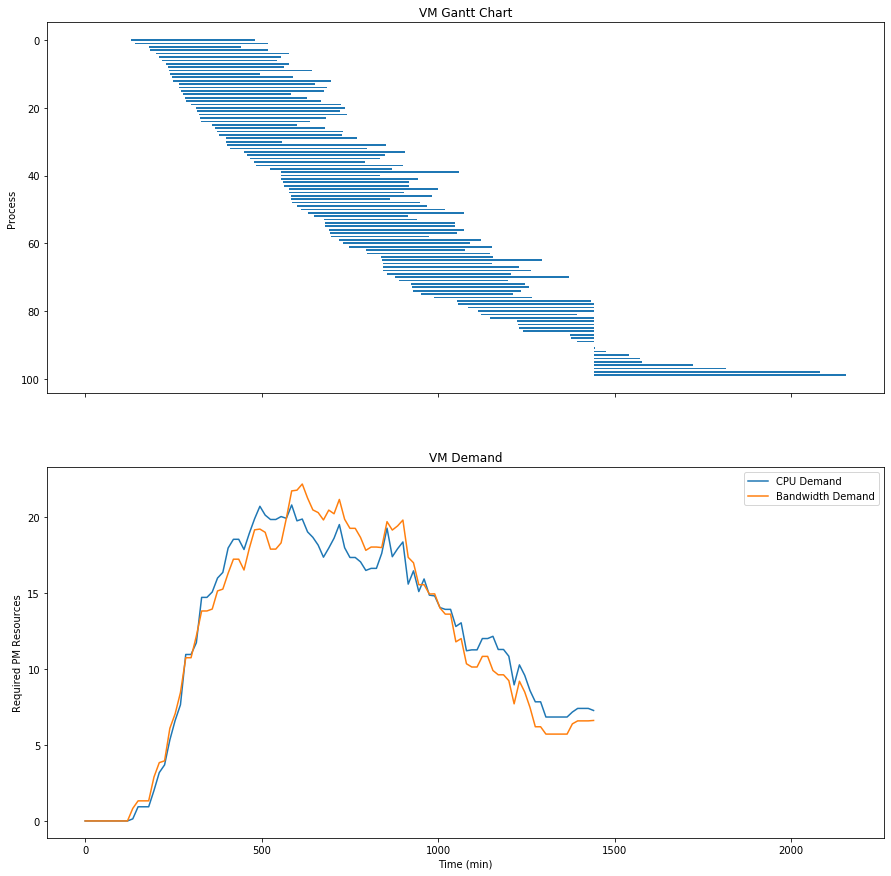

In [181]:
# Plot VM Gantt
order = np.argsort(vm_starts)
vm_data = np.vstack([np.arange(n_vms),
                     vm_starts[order], 
                     vm_ends[order], 
                     vm_durations[order],
                     cpu_load,
                     bw_load]).T

# Get Data Center Demand Curve
active_vm_count = []
cpu_load_list = []
bw_load_list = []

time = np.linspace(0, end_time, int(end_time / min_duration) + 1)
for i, t in enumerate(time):
    active = vm_data[np.where((vm_data[:,1]<=t) &
             (vm_data[:,2]>=t))[0]]
    active_vm_count.append(active.shape[0])
    cpu_load_list.append(active[:,4].sum())
    bw_load_list.append(active[:,5].sum())
    

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
for i in range(n_vms):
    ax[0].barh(i, vm_data[i, 3], left=vm_data[i, 1], height=0.5, color=colors[0])
    
ax[0].invert_yaxis()
ax[0].set_title('VM Gantt Chart')
# ax[0].set_xlabel('Time (min)')
ax[0].set_ylabel('Process')

ax[1].plot(time, cpu_load_list, label='CPU Demand')
ax[1].plot(time, bw_load_list, label='Bandwidth Demand')
ax[1].set_title('VM Demand')
ax[1].set_xlabel('Time (min)')
ax[1].set_ylabel('Required PM Resources')
ax[1].legend()
plt.xlim[0, end_time]
plt.show()

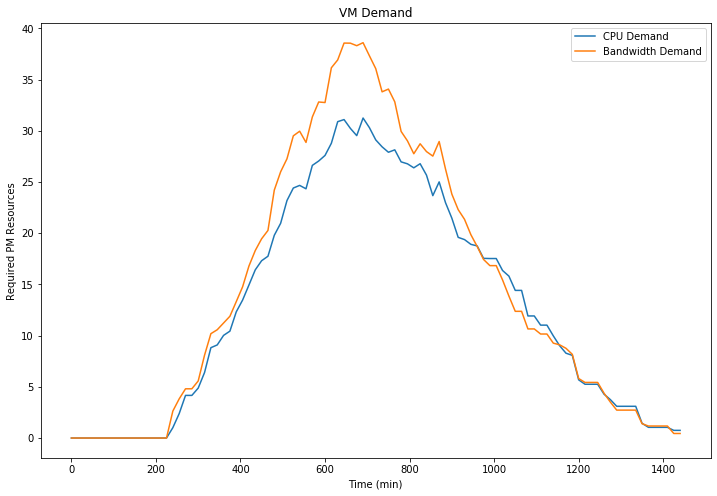

In [172]:
#### Get Data Center Demand Curve
active_vm_count = []
cpu_load_list = []
bw_load_list = []

time = np.linspace(0, end_time, int(end_time / min_duration) + 1)
for i, t in enumerate(time):
    active = vm_data[np.where((vm_data[:,1]<=t) &
             (vm_data[:,2]>=t))[0]]
    active_vm_count.append(active.shape[0])
    cpu_load_list.append(active[:,4].sum())
    bw_load_list.append(active[:,5].sum())
    
plt.figure(figsize=(12,8))
plt.plot(time, cpu_load_list, label='CPU Demand')
plt.plot(time, bw_load_list, label='Bandwidth Demand')
plt.title('VM Demand')
plt.xlabel('Time (min)')
plt.ylabel('Required PM Resources')
plt.legend()
plt.show()

In [169]:
time

array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.,  165.,  180.,  195.,  210.,  225.,  240.,  255.,
        270.,  285.,  300.,  315.,  330.,  345.,  360.,  375.,  390.,
        405.,  420.,  435.,  450.,  465.,  480.,  495.,  510.,  525.,
        540.,  555.,  570.,  585.,  600.,  615.,  630.,  645.,  660.,
        675.,  690.,  705.,  720.,  735.,  750.,  765.,  780.,  795.,
        810.,  825.,  840.,  855.,  870.,  885.,  900.,  915.,  930.,
        945.,  960.,  975.,  990., 1005., 1020., 1035., 1050., 1065.,
       1080., 1095., 1110., 1125., 1140., 1155., 1170., 1185., 1200.,
       1215., 1230., 1245., 1260., 1275., 1290., 1305., 1320., 1335.,
       1350., 1365., 1380., 1395., 1410., 1425., 1440.])

In [158]:
end[:,4].shape

(59,)

In [4]:
df_schema = pd.read_csv('https://azurecloudpublicdataset2.blob.core.windows.net/azurepublicdatasetv2/schema.csv')
df_schema

,filepattern,field_number,content,format
0,vm_virtual_core_bucket_definition.csv,1,bucket,STRING
1,vm_virtual_core_bucket_definition.csv,2,definition,STRING
2,vm_memory_bucket_definition.csv,1,bucket,STRING
3,vm_memory_bucket_definition.csv,2,definition,STRING
4,subscriptions/subscriptions.csv.gz,1,subscription id,STRING_HASH
5,subscriptions/subscriptions.csv.gz,2,timestamp first vm created,INTEGER
6,subscriptions/subscriptions.csv.gz,3,count vms created,INTEGER
7,deployment/deployment.csv.gz,1,deployment id,STRING_HASH
8,deployment/deployment.csv.gz,2,deployment size,INTEGER
9,vmtable/vmtable.csv.gz,1,vm id,STRING_HASH


In [276]:
col_names = df_schema.loc[df_schema['filepattern']=='vmtable/vmtable.csv.gz']['content'].values
# df = pd.read_csv('vm_cpu_readings-file-1-of-195.csv', header=None, index_col=False)
df = pd.read_csv('vmtable.csv', header=None, index_col=False)
df.columns = col_names
df.head()

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count bucket,vm memory (gb) bucket
0,71fJw0x+SDRdAxKPwLyHZhTgQpYw2afS6tjJhfT6kHnmLH...,GB6uQC1NSArW5n+TtOybL7GQ1yByjuWtZnsj+5QccZ525R...,2sh/ZjaYdfpslv4iYBfNzFe4rs982kHVvNGJGeQ8MIBCDr...,558300,1673700,91.776885,0.728879,20.759630,Delay-insensitive,8,32
1,rKggHO/04j31UFy65mDTwtjdMQL/G03xWfl3xGeiilB4/W...,ub4ty8ygwOECrIz7eaZ/9hDwnCsERvZ3nJJ03sDSpD85et...,+ZraIDUNaWYDZMBiBtZm7xSjr+j3zcHGjup1+wyKxHFmyJ...,424500,425400,37.879261,3.325358,37.879261,Unknown,4,32
2,YrR8gPtBmfNaOdnNEW5If1SdTqQgGQHEnLHGPjySt53bKW...,9LrdYRcUfGbmL2fFfLR/JUg2OTkjGRe3iluwIhDRPnPDPa...,GEyIElfPSFupze8T+T1niQMepeqG88VpLNuxUMyIDbz8VF...,1133100,1133700,0.304368,0.220553,0.304368,Unknown,4,32
3,xzQ++JF1UAkh70CDhmzkiOo+DQn+E2TLErCFKEmSswv1pl...,0XnZZ8sMN5HY+Yg+0dykYB5oenlgsrCpzpgFSvn/MX42Ze...,7aCQS6fPUw9rwCPiqvghk/WCEbMV3KgNJjA+sssdfY5Ybl...,0,2591400,98.573424,30.340054,98.212503,Interactive,2,4
4,vZEivnhabRmImDr+JqKqZnpIM3WxtypwoxjfjnklR/idyR...,HUGaZ+piPP4eHjycCBki2yq0raJywdzrVuriR6nQceH3hA...,/s/D5VtTQDxyS6wq7N/VQAMczx61Ny1Ut3a3iFmDSOCXxp...,228300,229800,82.581449,13.876299,82.581449,Unknown,2,4


In [315]:
df['start_time'] = df['timestamp vm created'] / 60 # Minutes
df['end_time'] = df['timestamp vm deleted'] / 60 # Minutes
df['duration'] = df['end_time'] - df['start_time']
df['duration'] = df['duration'].map(lambda x: max(x, 5)) # From the analysis doc

# Map times to single day
df['start_time'] = df['start_time'] / 60 % 24
df['end_time'] = df['end_time'] / 60 % 24 

# Aggregate into 15 min buckets
time_buckets = np.linspace(0, 24, int(24) + 1)
# time_buckets = np.linspace(0, 60*24, int(60*24+1))
df['start_interval'] = pd.cut(df['start_time'], time_buckets, right=False)
df['end_interval'] = pd.cut(df['end_time'], time_buckets, right=False)

df['start_interval'] = df['start_interval'].map(lambda x: x.left)
df['end_interval'] = df['end_interval'].map(lambda x: x.left)

# Drop Nan values
df.dropna(inplace=True)
# df['start_interval'] = df['start_interval'].fillna(0)
# df['end_interval'] = df['end_interval'].fillna(0)

In [316]:
# Group by intervals to get starts, stops and other interval stats
starts = df.groupby(['start_interval'])['avg cpu'].agg({'count', 'mean'})
ends = df.groupby(['end_interval'])['avg cpu'].agg({'count', 'mean'})

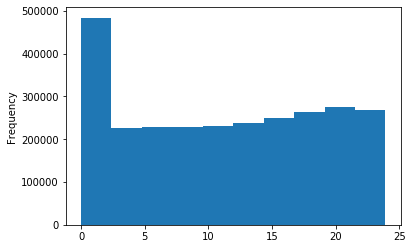

In [317]:
df['start_time'].plot(kind='hist')

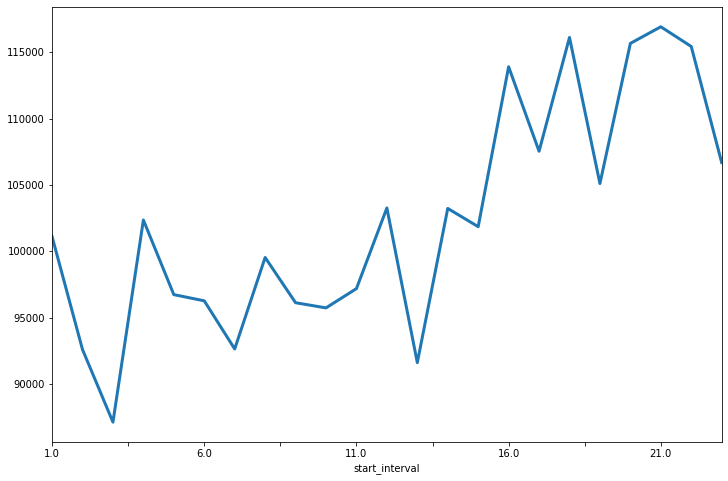

In [320]:
starts['count'][1:].plot(figsize=(12,8), linewidth=3)
plt.show()

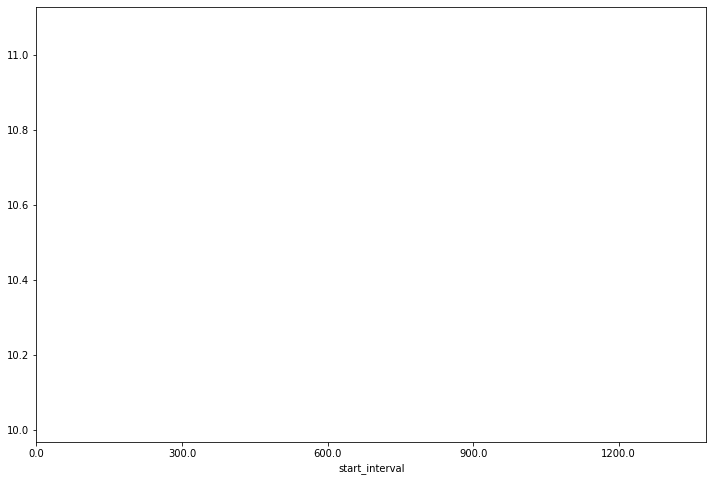

In [202]:
starts['mean'].plot(figsize=(12,8), linewidth=0.5)

In [203]:
starts.tail()

,count,mean
start_interval,,
1140.0,0,NaN
1200.0,0,NaN
1260.0,0,NaN
1320.0,0,NaN
1380.0,0,NaN


In [204]:
time_buckets

array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
        540.,  600.,  660.,  720.,  780.,  840.,  900.,  960., 1020.,
       1080., 1140., 1200., 1260., 1320., 1380., 1440.])

In [213]:
df['start_time'].max()

20.0

In [242]:
x = df['timestamp vm created'] / 60

In [243]:
x.mean() % 60

15.890172692259512

In [244]:
y = x % 
y.max()

10.0

In [240]:
y.max()

20.0

In [260]:
x = np.random.randint(low=61, high=720, size=10)
td = pd.DataFrame({'timestamp': x})

In [261]:
td['minute'] = td['timestamp'] % 60
td

,timestamp,minute
0,298,58
1,604,4
2,67,7
3,713,53
4,108,48
5,582,42
6,155,35
7,656,56
8,300,0
9,559,19


In [268]:
intervals = np.linspace(0, 60, int(60 / 15 + 1))

In [270]:
td['interval'] = pd.cut(td['minute'], intervals, right=False)

In [271]:
td

,timestamp,minute,interval
0,298,58,"[45.0, 60.0)"
1,604,4,"[0.0, 15.0)"
2,67,7,"[0.0, 15.0)"
3,713,53,"[45.0, 60.0)"
4,108,48,"[45.0, 60.0)"
5,582,42,"[30.0, 45.0)"
6,155,35,"[30.0, 45.0)"
7,656,56,"[45.0, 60.0)"
8,300,0,"[0.0, 15.0)"
9,559,19,"[15.0, 30.0)"


In [286]:
dfx = df.iloc[:10][['timestamp vm created']]

In [287]:
dfx['minute created'] = dfx['timestamp vm created'] / 60

In [288]:
dfx['minutes'] = dfx['minute created'] % 1440
dfx

,timestamp vm created,minute created,minutes
0,558300,9305.0,665.0
1,424500,7075.0,1315.0
2,1133100,18885.0,165.0
3,0,0.0,0.0
4,228300,3805.0,925.0
5,1395600,23260.0,220.0
6,1422300,23705.0,665.0
7,2414400,40240.0,1360.0
8,165900,2765.0,1325.0
9,268500,4475.0,155.0


In [289]:
time_buckets

array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
        540.,  600.,  660.,  720.,  780.,  840.,  900.,  960., 1020.,
       1080., 1140., 1200., 1260., 1320., 1380., 1440.])

In [290]:
pd.cut(dfx['minutes'], time_buckets, right=False)

0      [660.0, 720.0)
1    [1260.0, 1320.0)
2      [120.0, 180.0)
3         [0.0, 60.0)
4      [900.0, 960.0)
5      [180.0, 240.0)
6      [660.0, 720.0)
7    [1320.0, 1380.0)
8    [1320.0, 1380.0)
9      [120.0, 180.0)
Name: minutes, dtype: category
Categories (24, interval[float64]): [[0.0, 60.0) < [60.0, 120.0) < [120.0, 180.0) < [180.0, 240.0) ... [1200.0, 1260.0) < [1260.0, 1320.0) < [1320.0, 1380.0) < [1380.0, 1440.0)]